In [ ]:
%load_ext tensorboard
%tensorflow_version 2.x

# Init global infos
import numpy as np
from tensorflow import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow as tf
import os
import pathlib
import skimage
# load numpy array from npy file
from numpy import load


batch_size = 256
num_epochs = 10

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# ------------------------------------------------------------------------------
# -- Preparing Data Generators for training and validation set
# ------------------------------------------------------------------------------

# get training and validation set:
y_train = load('drive/My Drive/Data/y_train_vgg_wo.npy')
y_val = load('drive/My Drive/Data/y_val_vgg_wo.npy')
y_test = load('drive/My Drive/Data/y_test_vgg_wo.npy')

# load array
X_train = load('drive/My Drive/Data/np_train_vgg_wo.npy')
X_val = load('drive/My Drive/Data/np_val_vgg_wo.npy')
X_test = load('drive/My Drive/Data/np_test_vgg_wo.npy')

In [ ]:
inputs = keras.layers.Input(shape=(2048))
dense2 = keras.layers.Dense(124, activation='relu')(inputs)
output = keras.layers.Dense(2, activation='softmax')(dense2)

model = keras.Model(inputs=inputs, outputs=[output])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2048)]            0         
_________________________________________________________________
dense (Dense)                (None, 124)               254076    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 250       
Total params: 254,326
Trainable params: 254,326
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

# Evaluate training
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
636/636 [==============================] - 2s 3ms/step - loss: 0.5486 - accuracy: 0.7218 - val_loss: 0.5456 - val_accuracy: 0.7238
Epoch 2/10
636/636 [==============================] - 2s 3ms/step - loss: 0.5239 - accuracy: 0.7383 - val_loss: 0.5388 - val_accuracy: 0.7259
Epoch 3/10
636/636 [==============================] - 2s 3ms/step - loss: 0.5160 - accuracy: 0.7434 - val_loss: 0.5322 - val_accuracy: 0.7289
Epoch 4/10
636/636 [==============================] - 2s 3ms/step - loss: 0.5095 - accuracy: 0.7468 - val_loss: 0.5351 - val_accuracy: 0.7323
Epoch 5/10
636/636 [==============================] - 2s 3ms/step - loss: 0.5032 - accuracy: 0.7519 - val_loss: 0.5391 - val_accuracy: 0.7288
Epoch 6/10
636/636 [==============================] - 2s 3ms/step - loss: 0.4974 - accuracy: 0.7553 - val_loss: 0.5368 - val_accuracy: 0.7275
Epoch 7/10
636/636 [==============================] - 2s 3ms/step - loss: 0.4925 - accuracy: 0.7589 - val_loss: 0.5569 - val_accuracy: 0.7211
Epoch 

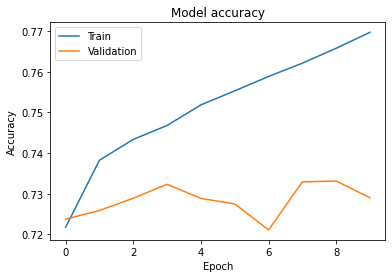

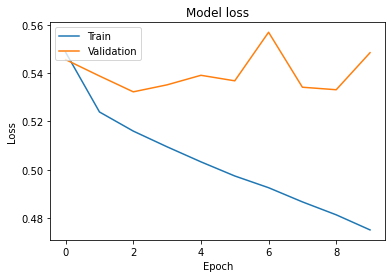

In [ ]:
def plot_model_history(history):
    '''plots useful graphs about the model training: loss, accuracy, ecc.'''
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# plot the training and validation loss for every epoch:
plot_model_history(history)

In [ ]:
X_test_woman = load('drive/My Drive/Data/np_woman_test_vgg_wo.npy')
X_train_woman = load('drive/My Drive/Data/np_woman_train_vgg_wo.npy')

y_pred_female = model.predict(X_test_woman)
y_pred_female = np.argmax(y_pred_female, axis=1)

X_test_man = load('drive/My Drive/Data/np_man_test_vgg_wo.npy')
X_train_man = load('drive/My Drive/Data/np_man_train_vgg_wo.npy')

y_pred_male = model.predict(X_test_man)
y_pred_male = np.argmax(y_pred_male, axis=1)

y_train_man = load('drive/My Drive/Data/y_man_train_vgg1_wo.npy')
y_train_woman = load('drive/My Drive/Data/y_woman_train_vgg1_wo.npy')

y_test_man = load('drive/My Drive/Data/y_man_test_vgg1_wo.npy')
y_test_woman = load('drive/My Drive/Data/y_woman_test_vgg1_wo.npy')

y_test_female_binary = np.argmax(y_test_woman, axis=1)
y_test_male_binary = np.argmax(y_test_man, axis=1)

In [ ]:
print(y_test_woman.shape)
print(y_pred_female.shape)

(12247, 2)
(12247,)


In [ ]:
from sklearn.metrics import confusion_matrix
tn_female, fp_female, fn_female, tp_female = confusion_matrix(y_test_female_binary, y_pred_female).ravel()
tn_male, fp_male, fn_male, tp_male = confusion_matrix(y_test_male_binary, y_pred_male).ravel()

## female
prob_true_female = (tp_female + fp_female)/y_test_female_binary.shape[0]
print("prob_true female:", prob_true_female)
prob_correct_female_1 = tp_female/(tp_female + fn_female)
print("prob_correct 1 female:",prob_correct_female_1)
prob_correct_female_0 = tn_female/(tn_female + fp_female)
print("prob_correct 0 female:",prob_correct_female_0)

## male
prob_true_male = (tp_male + fp_male)/y_test_male_binary.shape[0]
print("prob_true male:", prob_true_male)
prob_correct_male_1 = tp_male/(tp_male + fn_male)
print("prob_correct 1 male:", prob_correct_male_1)
prob_correct_male_0 = tn_male/(tn_male + fp_male)
print("prob_correct 0 male:",prob_correct_male_0)

parity_gap = abs(prob_true_male - prob_true_female)
equality_gap_1 = abs(prob_correct_female_1 - prob_correct_male_1)
equality_gap_0 = abs(prob_correct_female_0 - prob_correct_male_0)

print("parity gap:", parity_gap)
print("equality gap 1:", equality_gap_1)
print("equality gap 0:", equality_gap_0)


prob_true female: 0.6607332407936638
prob_correct 1 female: 0.7865731462925851
prob_correct 0 female: 0.5749472202674173
prob_true male: 0.17161373946856773
prob_correct 1 male: 0.3934169278996865
prob_correct 0 male: 0.9015686950525772
parity gap: 0.4891195013250961
equality gap 1: 0.3931562183928986
equality gap 0: 0.3266214747851599


In [ ]:
y_test_woman_zeros = tf.keras.utils.to_categorical(np.zeros((y_test_woman.shape[0],1)), num_classes = 2)
y_test_man_ones = tf.keras.utils.to_categorical(np.ones((y_test_man.shape[0],1)), num_classes = 2)

y_train_woman_zeros = tf.keras.utils.to_categorical(np.zeros((y_train_woman.shape[0],1)), num_classes = 2)
y_train_man_ones = tf.keras.utils.to_categorical(np.ones((y_train_man.shape[0],1)), num_classes = 2)

In [ ]:
y_train_gender = np.concatenate((y_train_man_ones, y_train_woman_zeros))


In [ ]:
##Retrain baseline model (trained on predicting attractiveness) to predict gender

model_1 = keras.models.clone_model(model)
model_1.set_weights(model.get_weights()) 

model_1._layers.pop()
for layer in model_1.layers: layer.trainable = False  

# recover the output from the last layer in the model and use as input to new Dense layer
last = model_1.layers[-1].output
output = keras.layers.Dense(2, activation="softmax", name="output")(last)
model_1 = keras.models.Model(model_1.input, output)

for layer in model_1.layers:
    print(layer, layer.trainable)
    
model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics={"output":'accuracy'})

model_1.summary()

history = model_1.fit(np.concatenate((X_train_man,X_train_woman)), y_train_gender, epochs=5,
    shuffle=True,
    verbose=1)
score_male = model_1.evaluate(X_test_man, y_test_man_ones, verbose=0)
print('Test loss male:', score_male[0])
print('Test accuracy male:', score_male[1])
score_female = model_1.evaluate(X_test_woman, y_test_woman_zeros, verbose=0)
print('Test loss female:', score_female[0])
print('Test accuracy female:', score_female[1])

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9433347f28> False
<tensorflow.python.keras.layers.core.Dense object at 0x7f94333460b8> False
<tensorflow.python.keras.layers.core.Dense object at 0x7f9433347e48> True
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2048)]            0         
_________________________________________________________________
dense (Dense)                (None, 124)               254076    
_________________________________________________________________
output (Dense)               (None, 2)                 250       
Total params: 254,326
Trainable params: 250
Non-trainable params: 254,076
_________________________________________________________________
Epoch 1/5
5087/5087 [==============================] - 11s 2ms/step - loss: 0.3672 - accuracy: 0.8375
Epoch 2/5
5087/5087 [======================